# CSOC IG Prerequisites - Part 2

### Header

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Reading Dataset

houses = pd.read_csv(r'./housing.csv')
houses = houses.dropna().reset_index(drop=True)
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Extracting Features & Target 

ocean_dict = {'<1H OCEAN':4, 'INLAND' :5, 'NEAR OCEAN':3,'NEAR BAY':2,'ISLAND':1}
houses.ocean_proximity = houses.ocean_proximity.apply(lambda x: ocean_dict[x])

cols = ['housing_median_age','total_rooms','total_bedrooms','median_income','households','ocean_proximity']
feature = houses[cols]
target = houses.median_house_value

In [4]:
pd.concat((feature,target), axis=1).head()

,housing_median_age,total_rooms,total_bedrooms,median_income,households,ocean_proximity,median_house_value
0,41.0,880.0,129.0,8.3252,126.0,2,452600.0
1,21.0,7099.0,1106.0,8.3014,1138.0,2,358500.0
2,52.0,1467.0,190.0,7.2574,177.0,2,352100.0
3,52.0,1274.0,235.0,5.6431,219.0,2,341300.0
4,52.0,1627.0,280.0,3.8462,259.0,2,342200.0


### Definitions

In [5]:
# Defining Prediction function

def y_out(w, x, b):
    
    return (np.dot(w,x) + b)

In [6]:
# Defining Cost Function
def cost_fx(feature_var,target_var, w_var,b_var):
    m = feature_var.shape[0]

    del_y_arr = []
        
    for k in range(0,m):
        del_y = ( y_out(w_var, feature_var.iloc[k,:] , b_var) - target_var[k] )**2
        del_y_arr = np.append(del_y_arr, del_y)

    mse = (1/(2*m))*(np.sum(del_y_arr))

    return mse

In [7]:
# Defining Gradient descent

def grad_descent(feature_var, target_var, w_init, b_init, alpha, steps):
    m = feature_var.shape[0]
    w_new = []
    b_new = 0

    # Defining variables to use for plotting
    global y_cost
    y_cost = []
    

    for i in range(0, steps):

        cost_val = cost_fx(feature_var,target_var,w_init,b_init)
        
        # if i%5==0:
        #     print(cost_val)

        del_y_arr = []

        y_cost.append(cost_val)

        for k in range(0,m):
            del_y = ( y_out(w_init, feature_var.iloc[k,:] , b_init) - target_var[k] )
            del_y_arr = np.append(del_y_arr, del_y)
            
      

        for j in range(0, len(w_init)):
            x_arr = feature_var.iloc[:,j]
            err=0
            
            err = (alpha/m)*(np.dot(x_arr, del_y_arr))
            err = w_init[j] - err
            w_new = np.append(w_new , err)

        err=0
        err = (alpha/m)*(np.sum(del_y_arr))
        err = b_init - err
        b_new = err

        
        w_init=w_new
        b_init=b_new

        w_final = w_init
        b_final = b_init

        w_new = []
        b_new = 0

    return w_final,b_final



In [8]:
# Defining a function to remove outliers in preprocessing

def del_outlier(dataframe):
    df = pd.DataFrame(dataframe)
    for i in df.columns:
        iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
        mx = df[i].max() if (df[i].max() <= (df[i].quantile(0.75) + (1.5)*iqr)  ) else (df[i].quantile(0.75) + (1.5)*iqr)
        mn = df[i].min() if (df[i].min() >= (df[i].quantile(0.25) - (1.5)*iqr)  ) else (df[i].quantile(0.25) - (1.5)*iqr)
        
        df = df[(df[i]>mn) & (df[i]<mx)]
        
        return df

In [9]:
# Defining a function to rescale features & target in preprocessing

def rescale_srs(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    mx = series.max() #if (series.max() <= (series.quantile(0.75) + (1.5)*iqr)  ) else (series.quantile(0.75) + (1.5)*iqr)
    mn = series.min() #if (series.min() >= (series.quantile(0.25) - (1.5)*iqr)  ) else (series.quantile(0.25) - (1.5)*iqr)
    mu = series.mean()
    series = series.apply(lambda x : (x - mu)/(mx-mn))
    
    return series

In [10]:
# Defining a function to unscale features & target in preprocessing

def unscale_val(val, col_name):
    
    f2 = houses[cols2]
    f2 = del_outlier(f2)
    df2 = pd.concat( (f2, houses.median_house_value), join='inner',axis=1 )

    series = df2[col_name]
    iqr = series.quantile(0.75) - series.quantile(0.25)
    mx = series.max() #if (series.max() <= (series.quantile(0.75) + (1.5)*iqr)  ) else (series.quantile(0.75) + (1.5)*iqr)
    mn = series.min() #if (series.min() >= (series.quantile(0.25) - (1.5)*iqr)  ) else (series.quantile(0.25) - (1.5)*iqr)
    mu = series.mean()

    out = val*(mx-mn) + mu

    return out
    

In [11]:
# Defining Performance Metrics

def rms_err(y1,y2):
    y1,y2 = pd.Series(y1), pd.Series(y2)
    rms = (y1-y2)
    rms = rms*rms
    rms = rms.sum()/len(y1)
    rms = np.sqrt(rms)

    return rms


def ma_err(y1,y2):
    y1,y2 = pd.Series(y1), pd.Series(y2)
    ma = y1-y2
    ma = ma.apply(lambda x: np.absolute(x))
    ma = ma.sum()
    ma = ma/len(y1)

    return ma
    

def r2_score(y_p,y_t):
    y_p,y_t = pd.Series(y_p), pd.Series(y_t)
    sq_err = y_p - y_t
    sq_err = sq_err * sq_err
    sq_err = sq_err.sum()
    sq_tot = y_t * y_t
    sq_tot = sq_tot.sum()

    r2s = sq_err/sq_tot
    r2s = 1-r2s

    return r2s

### Body

In [12]:
# Preprocessing Data

global cols2
cols2 = ['housing_median_age','total_rooms','total_bedrooms','median_income','households']
feature2 = feature.copy()[cols2]

feature2 = del_outlier(feature2)
target2 = target.copy()
feature_combn = pd.concat( (feature2, feature['ocean_proximity']), join='inner', axis=1 )

df_new = pd.concat((feature_combn,target2), join='inner',axis=1).reset_index(drop=True)

feature2 = feature2.apply(rescale_srs, axis=0)
feature2 = pd.concat( (feature2, feature['ocean_proximity']), join='inner', axis=1 )
target2 = pd.concat((feature2,target2), join='inner',axis=1)['median_house_value']
target2 = rescale_srs(target2)

feature2 = feature2.reset_index(drop=True)
target2 = target2.reset_index(drop=True)

df_new

,housing_median_age,total_rooms,total_bedrooms,median_income,households,ocean_proximity,median_house_value
0,41.0,880.0,129.0,8.3252,126.0,2,452600.0
1,21.0,7099.0,1106.0,8.3014,1138.0,2,358500.0
2,42.0,2555.0,665.0,2.0804,595.0,2,226700.0
3,50.0,1120.0,283.0,2.1250,264.0,2,140000.0
4,50.0,2239.0,455.0,1.9911,419.0,2,158700.0
...,...,...,...,...,...,...,...
19159,25.0,1665.0,374.0,1.5603,330.0,5,78100.0
19160,18.0,697.0,150.0,2.5568,114.0,5,77100.0
19161,17.0,2254.0,485.0,1.7000,433.0,5,92300.0
19162,18.0,1860.0,409.0,1.8672,349.0,5,84700.0


In [13]:
pd.concat((feature2,target2), axis=1).head()

,housing_median_age,total_rooms,total_bedrooms,median_income,households,ocean_proximity,median_house_value
0,0.283746,-0.045985,-0.064845,0.307245,-0.062746,2,0.515969
1,-0.124417,0.112187,0.086792,0.305604,0.103701,2,0.321949
2,0.304154,-0.003384,0.018346,-0.123425,0.014392,2,0.050198
3,0.467420,-0.039881,-0.040944,-0.120349,-0.040049,2,-0.128564
4,0.467420,-0.011421,-0.014248,-0.129583,-0.014556,2,-0.090008


In [14]:
# Initialization

w = np.full(len(cols), fill_value=0.4)
# w = np.zeros(len(cols))
b = 0

In [15]:
# Training Model & Measuring the time

start = time.time()

w1, b1 = grad_descent(feature2, target2 ,w, b, 0.1,40)

end = time.time()
time_taken = end-start
print(f"Time taken: {time_taken:.2f} seconds")

Time taken: 117.32 seconds


In [16]:
# Predicting for an input

res = y_out(w1,feature2.iloc[2,],b1) 
print(res)
print('Predicted Value: ', f"{unscale_val(res, 'median_house_value'):.2f}", '$')
print('Actual Value: ', df_new.iloc[2,6], '$')

0.041102609356519625
Predicted Value:  222288.77 $
Actual Value:  226700.0 $


In [17]:
# Generating a Series of Predicted House value 

y_out_srs = []
for i in range(0,feature2.shape[0]):
    y_out_each = unscale_val( y_out(w1,feature2.iloc[i],b1), 'median_house_value')
    y_out_srs.append(y_out_each)

In [18]:
# Generating the metrics

rmse = rms_err(y_out_srs, df_new.median_house_value)
mae = ma_err(y_out_srs, df_new.median_house_value)
r2scr = r2_score(y_out_srs, df_new.median_house_value)

### Comparison & Performance Metrics

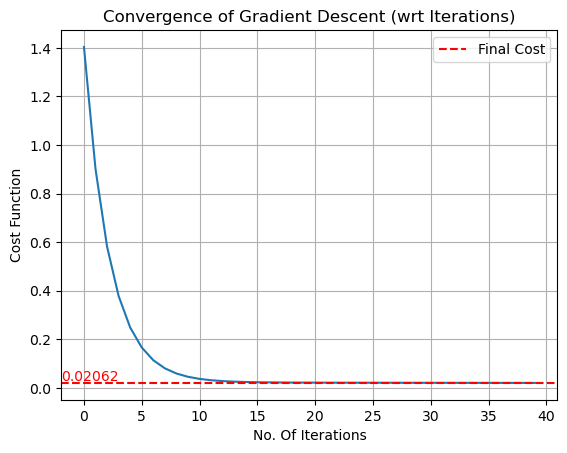

In [19]:
plt.plot(range(len(y_cost)), y_cost)
plt.title("Convergence of Gradient Descent (wrt Iterations)")
plt.xlabel("No. Of Iterations")
plt.ylabel("Cost Function")
plt.axhline(y=y_cost[-1], color='red', linestyle='--', label='Final Cost')
plt.legend()
plt.grid(True)
plt.text(-2, y_cost[-1]*1.5 , f"{y_cost[-1]:.5f}", color='red')
plt.show()

2.932940363883972


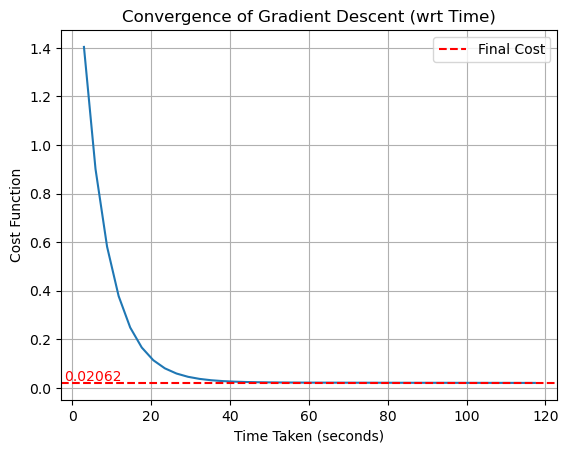

In [20]:
time_lst = []
t1 = time_taken/len(y_cost)
tk = 0
print(t1)
for i in range(len(y_cost)):
    tk+=t1
    time_lst.append(tk)
    

plt.plot(time_lst, y_cost)
plt.title("Convergence of Gradient Descent (wrt Time)")
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Cost Function')
plt.axhline(y=y_cost[-1], color='red', linestyle='--', label='Final Cost')
plt.legend()
plt.grid(True)
plt.text(-2, y_cost[-1]*1.5 , f"{y_cost[-1]:.5f}", color='red')
plt.show()

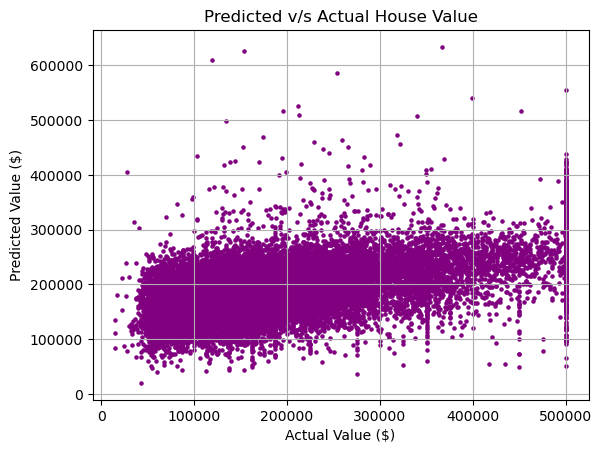

In [21]:
plt.scatter(y=y_out_srs , x=df_new.median_house_value, color = 'purple', s=5)
plt.grid(1)
plt.title('Predicted v/s Actual House Value')
plt.xlabel('Actual Value ($)')
plt.ylabel('Predicted Value ($)');

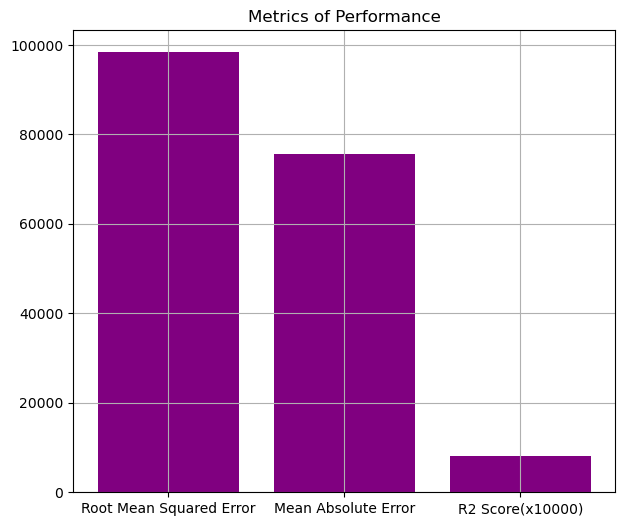

In [22]:
plt.figure(figsize=(7,6))
plt.grid(True)
plt.bar(x=['Root Mean Squared Error','Mean Absolute Error','R2 Score(x10000)'],height=[rmse,mae,r2scr*10000], color = 'purple')
plt.title('Metrics of Performance');

In [23]:
print(f'''Mean Absolute Error : {mae}
Root Mean Squared Eror : {rmse}
R2 Score : {r2scr}
Time Taken for training : {time_taken}''')

Mean Absolute Error : 75559.7496028754
Root Mean Squared Eror : 98375.97810735654
R2 Score : 0.8192569280936366
Time Taken for training : 117.31761455535889


### End of Code